In [274]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [275]:
df_train = pd.read_csv('loan-train.csv')
df_train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [276]:
def info():
    df.info()
    df.describe()


In [277]:
df_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [278]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Data Overview 

In [ ]:
# function to check for missing value, unique value, data type of each column

def data_overview(df):
    print("----- Data Info -----")
    print(df.info())
    
    print("\n----- Descriptive Statistics -----")
    print(df.describe(include='all'))  # include all types
    
    print("\n----- Missing Values -----")
    print(df.isnull().sum())
    
    print("\n----- Unique Value Counts -----")
    for col in df.columns:
        unique_vals = df[col].nunique()
        print(f"{col}: {unique_vals} unique values", end="")
        if unique_vals <= 10:
            print(f" → {df[col].unique()}")
        else:
            print()
    
    print("\n----- Data Types -----")
    print(df.dtypes)
    print('\n ------ Dataset Shape ------')
    print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")
data_overview(df_train)

----- Data Info -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None

----- Descriptive Statistics -----
         Loan_ID Gender Married Dependents Educat

## Check on credit history affecting loan status

In [154]:
pd.crosstab(df_train['Credit_History'], df_train['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


# Plot of data

<Axes: >

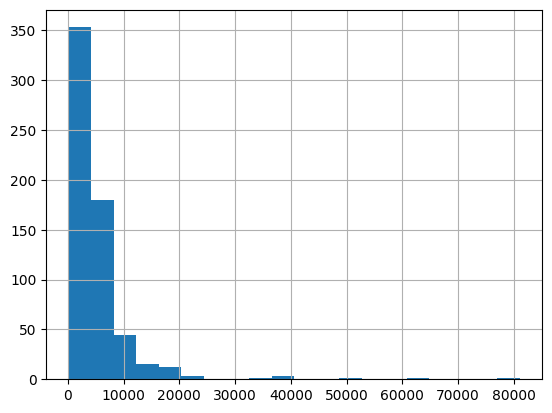

In [155]:
df_train['ApplicantIncome'].hist(bins=20)

<Axes: >

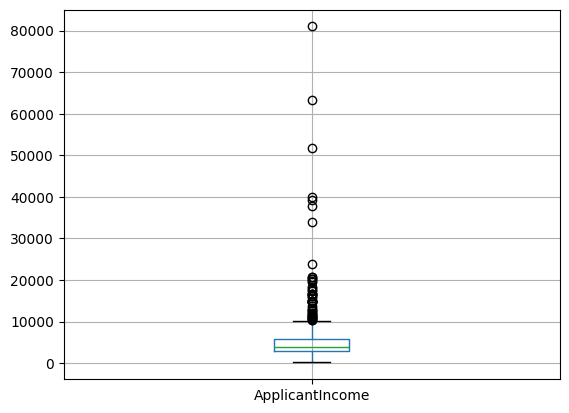

In [156]:
df_train.boxplot(column= 'ApplicantIncome')

<Axes: >

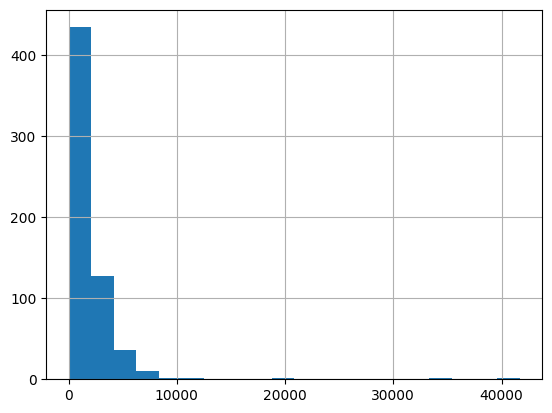

In [157]:
# histogram for coapplicant income

df_train['CoapplicantIncome'].hist(bins=20)

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

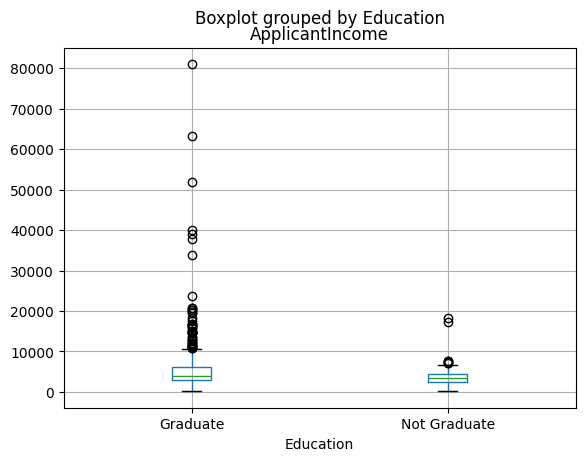

In [158]:
# applicant income by education

df_train.boxplot(column='ApplicantIncome', by='Education')

<Axes: >

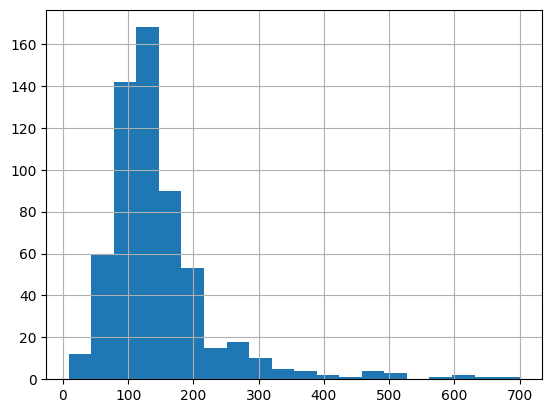

In [159]:
# histogram for loanAmount

df_train['LoanAmount'].hist(bins=20)

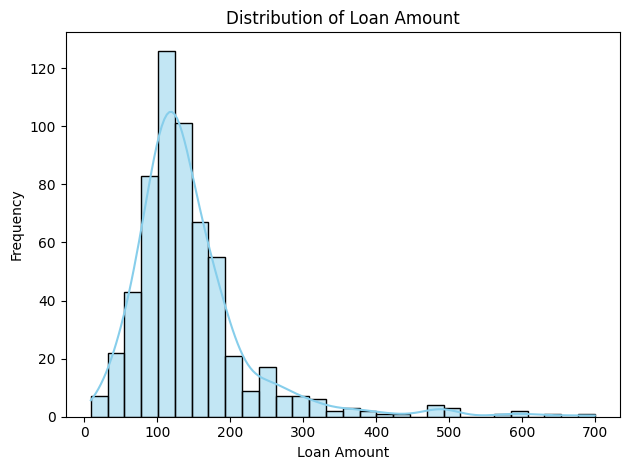

In [160]:
sns.histplot(data=df_train, x='LoanAmount', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

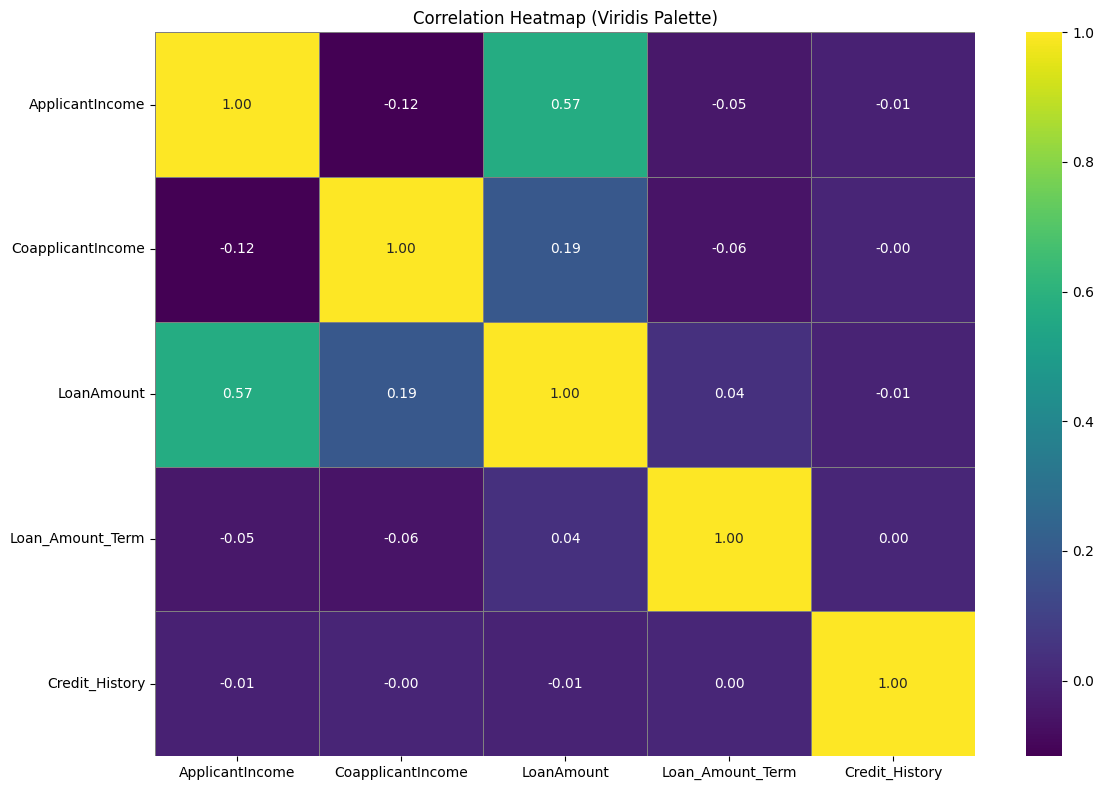

In [161]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df_train.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='viridis', linewidths=0.5, linecolor='gray')
plt.title('Correlation Heatmap (Viridis Palette)')
plt.tight_layout()
plt.show()


<Axes: >

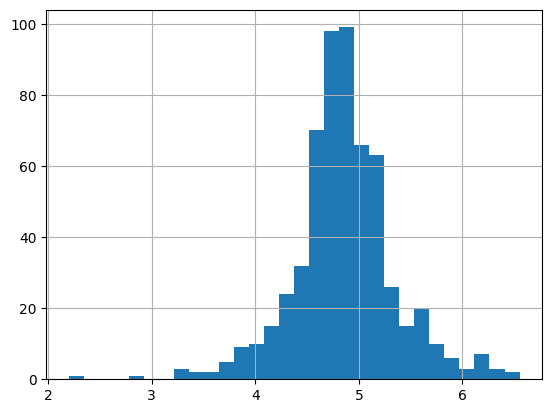

In [162]:
# Normalise LoanAmount
df_train['LoanAmount_log '] = np.log(df_train['LoanAmount'])
df_train['LoanAmount_log '].hist(bins=30)

In [163]:
df_train.shape

(614, 14)

In [164]:
# replace or fill missing values
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

In [165]:
df_train['Gender'].fillna(df_train['Gender'].mode(), inplace=True)

C:\Users\neetu\AppData\Local\Temp\ipykernel_23204\3983665845.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Gender'].fillna(df_train['Gender'].mode(), inplace=True)


In [166]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

In [167]:
def fill_missing(df):
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            if df[col].dtype == 'object':
                df[col] = df[col].fillna(df[col].mode()[0])
            else:
                df[col] = df[col].fillna(df[col].mean())
    return df

# Use it like this:
df = fill_missing(df_train)


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  LoanAmount_log     614 non-null    float64
dtypes: float64(5), int64(1), object(8)
memory usage: 67.3+ KB


<Axes: >

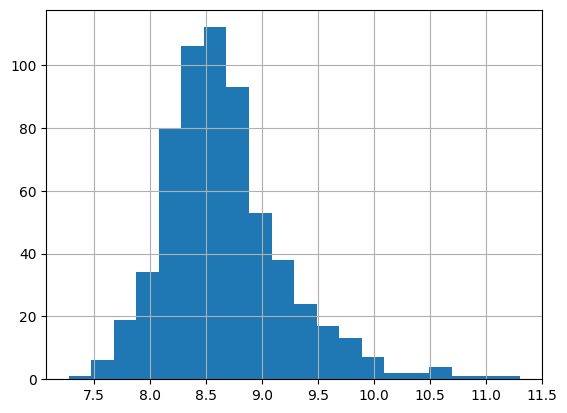

In [169]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['Total_Income_log'] = np.log(df.Total_Income)
df['Total_Income_log'].hist(bins=20)

In [170]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income,Total_Income_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.857444,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y,5.587249,9613.0,9.170872
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y,4.553877,3849.0,8.255569
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N,5.062595,5540.0,8.619750
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y,5.123964,5532.0,8.618305
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N,5.855072,23809.0,10.077819


In [171]:
X= df.drop(columns=['Loan_ID','ApplicantIncome', 'CoapplicantIncome','LoanAmount','Total_Income','Loan_Status', 'Loan_Amount_Term','Property_Area'])
y= df['Loan_Status']

In [ ]:
# or X = df.iloc[:, np.r_[1:5, 9:11, 13:15]].values

In [172]:
X

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,LoanAmount_log,Total_Income_log
0,Male,No,0,Graduate,No,1.0,4.857444,8.674026
1,Male,Yes,1,Graduate,No,1.0,4.852030,8.714568
2,Male,Yes,0,Graduate,Yes,1.0,4.189655,8.006368
3,Male,Yes,0,Not Graduate,No,1.0,4.787492,8.505323
4,Male,No,0,Graduate,No,1.0,4.948760,8.699515
...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,1.0,4.262680,7.972466
610,Male,Yes,3+,Graduate,No,1.0,3.688879,8.320205
611,Male,Yes,1,Graduate,No,1.0,5.533389,9.025456
612,Male,Yes,2,Graduate,No,1.0,5.231109,8.933664


In [173]:
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [174]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [175]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,LoanAmount_log,Total_Income_log
83,Male,Yes,0,Graduate,No,0.842199,5.579730,9.017968
90,Male,Yes,0,Graduate,No,1.000000,4.875197,8.675564
227,Male,Yes,2,Graduate,No,1.000000,5.347108,8.980298
482,Male,Yes,0,Graduate,No,1.000000,4.852030,8.562740
464,Male,No,0,Graduate,No,0.000000,4.584967,8.334712
...,...,...,...,...,...,...,...,...
71,Male,Yes,2,Not Graduate,Yes,1.000000,4.574711,8.229511
106,Male,Yes,2,Graduate,No,1.000000,5.416100,9.436918
270,Female,No,0,Graduate,No,1.000000,3.401197,8.082402
435,Female,Yes,0,Graduate,No,1.000000,4.857444,9.215029


In [176]:
X_train.dtypes

Gender               object
Married              object
Dependents           object
Education            object
Self_Employed        object
Credit_History      float64
LoanAmount_log      float64
Total_Income_log    float64
dtype: object

In [177]:
cat_cols = X_train.select_dtypes(include='object').columns.tolist()
cat_cols

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed']

In [178]:
# label encoder to eonvert categorical to numerical format

from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
for col in cat_cols:
    X_train[col] = labelencoder_X.fit_transform(X_train[col])
    X_test[col] = labelencoder_X.fit_transform(X_test[col])

In [179]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,LoanAmount_log,Total_Income_log
83,1,1,0,0,0,0.842199,5.579730,9.017968
90,1,1,0,0,0,1.000000,4.875197,8.675564
227,1,1,2,0,0,1.000000,5.347108,8.980298
482,1,1,0,0,0,1.000000,4.852030,8.562740
464,1,0,0,0,0,0.000000,4.584967,8.334712
...,...,...,...,...,...,...,...,...
71,1,1,2,1,1,1.000000,4.574711,8.229511
106,1,1,2,0,0,1.000000,5.416100,9.436918
270,0,0,0,0,0,1.000000,3.401197,8.082402
435,0,1,0,0,0,1.000000,4.857444,9.215029


In [180]:
X_test

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,LoanAmount_log,Total_Income_log
350,1,1,0,0,0,1.000000,5.429346,9.114160
377,1,1,0,0,0,0.842199,4.867534,8.368693
163,1,1,2,0,0,1.000000,5.062595,8.633019
609,0,0,0,0,0,1.000000,4.262680,7.972466
132,1,0,0,0,0,1.000000,4.248495,7.907652
...,...,...,...,...,...,...,...,...
231,1,1,0,0,0,1.000000,3.737670,8.220403
312,0,0,0,0,0,1.000000,4.025352,7.826842
248,1,1,1,0,0,1.000000,4.812184,8.460623
11,1,1,2,0,0,1.000000,4.691348,8.375630


In [181]:
labelencoder_y = LabelEncoder()
y_train = labelencoder_y.fit_transform(y_train)
y_test = labelencoder_y.fit_transform(y_test)

In [182]:
y_train

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,

In [183]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [184]:
# Scale the dataset
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

# Decision Tree Classifier

In [185]:
from sklearn.tree import DecisionTreeClassifier
DTClassifier = DecisionTreeClassifier(criterion= 'entropy', random_state= 42)
DTClassifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [186]:
# use this algorithm to predcit the value of test dataset

y_pred = DTClassifier.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [187]:
# check the accuracy
from sklearn import metrics
print(f'The Accuracy of decision tree is:', metrics.accuracy_score(y_pred,y_test))

The Accuracy of decision tree is: 0.6991869918699187


This accuracy is not good 

In [188]:
# Naive bayes algorithm

from sklearn.naive_bayes import GaussianNB
NBClassifier = GaussianNB()
NBClassifier.fit(X_train, y_train)

GaussianNB()

In [189]:
y_pred = NBClassifier.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [190]:
print(f'The Accuracy of Naive bayes tree is:', metrics.accuracy_score(y_pred,y_test))

The Accuracy of Naive bayes tree is: 0.7804878048780488


In [191]:
# check with rndom forest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [192]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [193]:
print(f'The Accuracy of RandomForest is:', metrics.accuracy_score(y_pred,y_test))

The Accuracy of RandomForest is: 0.7479674796747967


So for Now we will move forward with Naive bayes and check the accuracy on test data

In [245]:
# import loan-test.csv
df_test = pd.read_csv('loan-test.csv')
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [246]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [247]:
def fill_missing(df):
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            if df[col].dtype == 'object':
                df[col] = df[col].fillna(df[col].mode()[0])
            else:
                df[col] = df[col].fillna(df[col].mean())
    return df

# Use it like this:
df_test = fill_missing(df_test)

In [248]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [249]:
df_test['LoanAmount_log'] = np.log(df_test['LoanAmount'])

<Axes: >

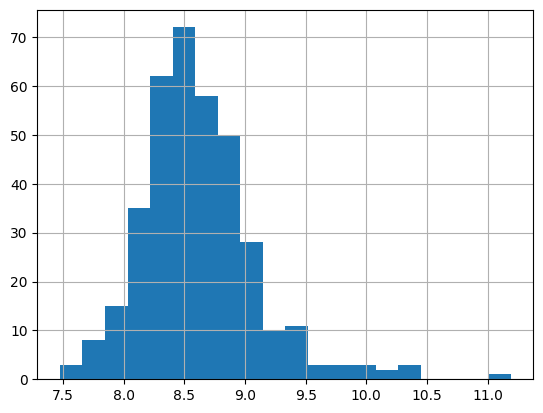

In [250]:
df_test['Total_Income'] = df_test['ApplicantIncome'] + df_test['CoapplicantIncome']
df_test['Total_Income_log'] = np.log(df_test.Total_Income)
df_test['Total_Income_log'].hist(bins=20)

In [251]:
print(df_test.columns.tolist())


['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'LoanAmount_log', 'Total_Income', 'Total_Income_log']


In [252]:
columns_to_use = [
    'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
    'Loan_Amount_Term', 'Credit_History', 'Property_Area',
    'LoanAmount_log', 'Total_Income', 'Total_Income_log'
]

df_test_selected = df_test[columns_to_use].values


In [253]:
df_test = df_test.iloc[:, np.r_[1:5, 9:11, 13:15]].values
df_test

array([['Male', 'Yes', '0', ..., 1.0, 5720, 8.651724084373843],
       ['Male', 'Yes', '1', ..., 1.0, 4576, 8.428580533059634],
       ['Male', 'Yes', '2', ..., 1.0, 6800, 8.824677891164198],
       ...,
       ['Male', 'No', '0', ..., 0.8254437869822485, 5243,
        8.564649132572534],
       ['Male', 'Yes', '0', ..., 1.0, 7393, 8.9082888855571],
       ['Male', 'No', '0', ..., 1.0, 9200, 9.126958763037132]],
      dtype=object)

In [254]:
# cat_cols = df_test_selected.select_dtypes(include='object').columns.tolist()
# cat_cols
# # label encoder to eonvert categorical to numerical format

# from sklearn.preprocessing import LabelEncoder
# labelencoder_X = LabelEncoder()
# for col in cat_cols:
#     df_test_selected[col] = labelencoder_X.fit_transform(df_test_selected[col])
# df_test_selected

In [255]:
for i in range(0,5):
    df_test[:,i]=labelencoder_X.fit_transform(df_test[:,i])

In [256]:
df_test[:,7] = labelencoder_X.fit_transform(df_test[:,7])
df_test

array([[1, 1, 0, ..., 1.0, 5720, 207],
       [1, 1, 1, ..., 1.0, 4576, 124],
       [1, 1, 2, ..., 1.0, 6800, 251],
       ...,
       [1, 0, 0, ..., 0.8254437869822485, 5243, 174],
       [1, 1, 0, ..., 1.0, 7393, 268],
       [1, 0, 0, ..., 1.0, 9200, 311]], dtype=object)

In [257]:
df_test = ss.fit_transform(df_test)

In [259]:
pred = NBClassifier.predict(df_test)
pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [264]:
df_test = pd.read_csv('loan-test.csv')  # or wherever your original df_test is


In [265]:
df_test['Loan_Status_Predicted'] = pred


In [267]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status_Predicted
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,1
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,1
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,1
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,1
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,1


In [268]:
df_test['Loan_Status_Predicted'] = df_test['Loan_Status_Predicted'].map({1: 'Y', 0: 'N'})


In [269]:
df_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status_Predicted
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,Y
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,Y
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban,Y
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,Y


In [270]:
df_test['Loan_Status_Predicted'].value_counts()


Loan_Status_Predicted
Y    308
N     59
Name: count, dtype: int64

In [271]:
df_test[['Loan_ID', 'Loan_Status_Predicted']].to_csv('loan_predictions.csv', index=False)


C:\Users\neetu\AppData\Local\Temp\ipykernel_23204\3754950705.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_test, x='Loan_Status_Predicted', palette='viridis')


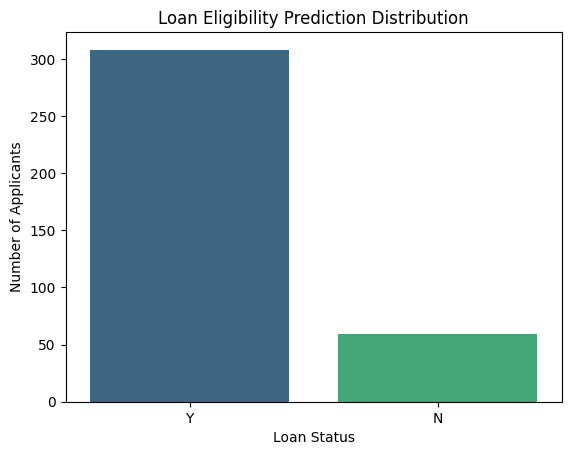

In [273]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df_test, x='Loan_Status_Predicted', palette='viridis')
plt.title('Loan Eligibility Prediction Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Number of Applicants')
plt.show()
